## **Import dan Cek Version Tensorflow**

In [29]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile
import os
from shutil import copyfile

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
from keras.preprocessing import image

In [2]:
print(tf.__version__)

2.4.1


## **Download Dataset**

In [3]:
# Download dataset
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2021-04-07 02:44:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.11MB/s    in 2m 20s  

2021-04-07 02:46:25 (2.20 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## **Ekstrak Datasetnya**

In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## **Menggunakan Fungsi Callback untuk Mencegah Overfitting**

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("Akurasi >= 99%, bisa overfit woe ")
      self.model.stop_training = True

callbacks = myCallback()

## **Join Direktori dan Membuat Direktori**

In [ ]:
base_dir = '/tmp/rockpaperscissors'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

### **Bikin direktori dulu (kalau udah ada skip aja)**

In [8]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

## **Train dan Test Datasetnya**

In [10]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4, random_state = 42)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4, random_state = 42)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4, random_state = 42)

In [11]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

### **Bikin direktori dulu (kalau udah ada skip aja)**

In [ ]:
# Direktori train untuk setiap label
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
# Direktori validation untuk setiap label
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

### **Copy FIle ke Directory Train dan Test**

In [13]:
# Directory train
for data in train_rock_dir:
  copyfile(os.path.join(rock_dir, data), os.path.join(train_rock, data))
for data in train_paper_dir:
  copyfile(os.path.join(paper_dir, data), os.path.join(train_paper, data))
for data in train_scissors_dir:
  copyfile(os.path.join(scissors_dir, data), os.path.join(train_scissors, data))

# Direktory val
for data in val_rock_dir:
  copyfile(os.path.join(rock_dir, data), os.path.join(val_rock, data))
for data in val_paper_dir:
  copyfile(os.path.join(paper_dir, data), os.path.join(val_paper, data))
for data in val_scissors_dir:
  copyfile(os.path.join(scissors_dir, data), os.path.join(val_scissors, data))

## **Augmentasi Gambar **

In [15]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [16]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')


"""
train_dir: direktori data trainnya
target_size: mengubah resolusi gambar yang ada di dataset jadi 150*150 px
class_mode: dalam kasus ini, ada 3 label (multiclass), jadi kita menggunakan categorical
validation_dir: direktori data data validasi
"""

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [20]:
history = model.fit(
          train_generator,
          steps_per_epoch=25,
          epochs=20,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[callbacks]
          )
"""
step_per_epoch: brp batch yg akan dieksekusi pd setiap epoch
validation_data: akurasi pengujian data validasi
validation_steps: berapa batch yg akan dieksekusi pada setiap epoch
"""

Epoch 1/20
25/25 - 23s - loss: 0.2051 - accuracy: 0.9275 - val_loss: 0.2717 - val_accuracy: 0.9000
Epoch 2/20
25/25 - 23s - loss: 0.2420 - accuracy: 0.9275 - val_loss: 0.1467 - val_accuracy: 0.9625
Epoch 3/20
25/25 - 23s - loss: 0.2930 - accuracy: 0.8850 - val_loss: 0.3524 - val_accuracy: 0.8375
Epoch 4/20
25/25 - 23s - loss: 0.2341 - accuracy: 0.9075 - val_loss: 0.2533 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 23s - loss: 0.1803 - accuracy: 0.9300 - val_loss: 0.1622 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 23s - loss: 0.1760 - accuracy: 0.9650 - val_loss: 0.1945 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 23s - loss: 0.1222 - accuracy: 0.9550 - val_loss: 0.3005 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 23s - loss: 0.1574 - accuracy: 0.9525 - val_loss: 0.1363 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 23s - loss: 0.0847 - accuracy: 0.9625 - val_loss: 0.2470 - val_accuracy: 0.9250
Epoch 10/20
25/25 - 23s - loss: 0.1521 - accuracy: 0.9275 - val_loss: 0.2748 - val_accuracy: 0.9375
Epoch 11/

## **Plot Loss dan Akurasi**

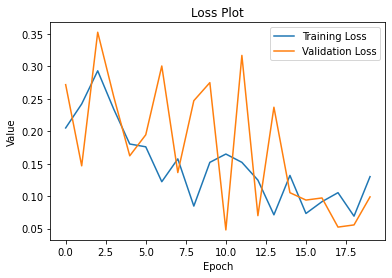

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

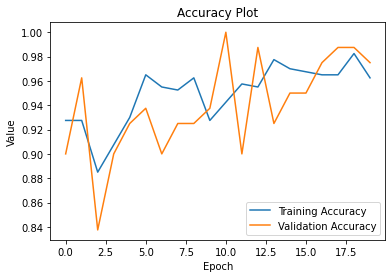

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

## **Confusion Matrix dan LIhat Precision, Recall, F1 Score**

### **Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(validation_generator, 32)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
confusion_array = confusion_matrix(validation_generator.classes, y_pred)

true_positive = confusion_array[1,1]
true_negative = confusion_array[0,0]
false_positive = confusion_array[0,1]
false_negative = confusion_array[1,0]

print('True Negative = ', true_negative)
print('False Negative = ', false_negative)
print('True Positive = ', true_positive)
print('False Positive = ', false_positive)

Confusion Matrix
True Negative =  96
False Negative =  102
True Positive =  90
False Positive =  87


## **Precision, Recall, F1 Score**

In [24]:
# Precison
Precision = true_positive / (true_positive+false_positive)
print("Precision : ", Precision)

# Recall
Recall = true_positive / (true_positive+false_negative)
print("Recall : ",Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score : ",F1_Score)

Precision :  0.5084745762711864
Recall :  0.46875
F1_Score :  0.4878048780487804


## **Print Semua Data (Train, Val, Loss, Accuraccy, Precision, Recall, F1 Score)**

In [32]:
print('Data Train: ',train_generator.n)
print('Data Validation: ',validation_generator.n)

score_train = model.evaluate(train_generator)
print('Loss: ',score_train[0])
print('Accuraccy: ', score_train[1])

score_validation = model.evaluate(validation_generator)
print('Loss: ',score_validation[0])
print('Accuraccy: ', score_validation[1])

print("Precision : ", Precision)
print("Recall : ",Recall)
print("F1_Score : ",F1_Score)

Data Train:  1312
Data Validation:  876
82/82 [==============================] - 26s 313ms/step - loss: 0.0970 - accuracy: 0.9748
Loss:  0.09703116863965988
Accuraccy:  0.9748475551605225
55/55 [==============================] - 17s 310ms/step - loss: 0.1616 - accuracy: 0.9475
Loss:  0.1615949422121048
Accuraccy:  0.9474886059761047
Precision :  0.5084745762711864
Recall :  0.46875
F1_Score :  0.4878048780487804


Bisa dilihat, akurasinya sudah lebih dari 85%, hal ini jelas terjadi karena kemungkinan dia juga membandingkan dengan gambar 1 folder yang jumlahnya banyak, otomatis angka akurasinya jadi besar. Namun untuk precision, recall, dan F1 scorenya masih belum bagus. Hal ini bisa kita lihat juga dalam confusion matrixnya, bagian false positive dan false negativenya masih besar, artinya model yang kita buat ini masih sering menebak gambar yang salah.

## **Upload File Untuk Melakukan Prediksi**

Saving 1fKclJk4eBWOQSR1.png to 1fKclJk4eBWOQSR1.png
1fKclJk4eBWOQSR1.png
paper


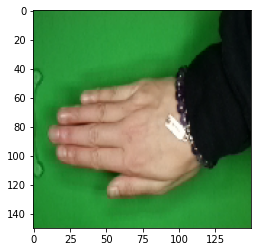

In [30]:
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')